# SpeakSense - Language Detection System (Machine Learning CSCI 6364)

**Abde Manaaf Ghadiali (G29583342), Gehna Ahuja (G00000000), Venkatesh Shanmugam (G00000000)**

The objective of this project is to develop a robust and accurate system capable of detecting the language spoken in audio recordings. By leveraging advanced machine learning algorithms and signal processing techniques, the system aims to accurately identify the language spoken in various audio inputs, spanning diverse accents, dialects, and environmental conditions. This language detection solution seeks to provide practical applications in speech recognition, transcription, translation, and other fields requiring language-specific processing, thereby enhancing accessibility and usability across linguistic boundaries.

This code sets up an environment for working with audio data, particularly focusing on Indian languages. Here's a breakdown of what each part does:

1. **Importing Libraries**: Imports necessary libraries for data manipulation, visualization, machine learning, and audio processing.

2. **Setting Display Options and Suppressing Warnings**: Configures display options for Pandas and suppresses warnings.

3. **Setting Random Seed**: Sets a random seed for reproducibility.

4. **Downloading Datasets**: Checks if the necessary datasets are downloaded, and if not, downloads them from Kaggle using the OpenDatasets library and organizes them into appropriate directories.

5. **Audio Data Processing**: Prepares the audio data for further analysis. This might include feature extraction, preprocessing, and organizing the data for training machine learning models.

6. **Machine Learning**: Utilizes machine learning techniques for tasks such as spoken language identification. This involves splitting the data into training and testing sets, building machine learning models (such as Random Forest or Gradient Boosting), evaluating the models, and generating classification reports and confusion matrices.

7. **Deep Learning**: Utilizes deep learning techniques, specifically convolutional neural networks (CNNs), for tasks such as spoken language identification. This involves building and training deep learning models using the TensorFlow and Keras libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import tensorflow as tf

import warnings
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, BatchNormalization, Input, AveragePooling2D, Conv1D, AveragePooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.preprocessing import image_dataset_from_directory

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
np.random.seed(42)

# Model Training

### Classical ML Models

In [2]:
mfcc_feature_mean_dataframe = pd.read_csv('../data/model_data/mfcc_feature_mean_dataframe_v1.csv', converters={'mfcc_features_mean': pd.eval})
mfcc_feature_mean_dataframe

,file_name,language_label,file_size_kb,sample_rate,audio_duration_sec,mfcc_features_mean
0,../data/spoken_language_identification/train/t...,german,241.913,22050,10,"[-300.68445, 89.6091, 7.92721, 13.455984, -7.7..."
1,../data/spoken_language_identification/train/t...,german,247.070,22050,10,"[-263.93332, 117.02668, 1.5109781, 10.758349, ..."
2,../data/spoken_language_identification/train/t...,german,235.787,22050,10,"[-314.33453, 107.28552, 36.247402, 30.700155, ..."
3,../data/spoken_language_identification/train/t...,german,236.962,22050,10,"[-315.92404, 101.78857, 30.910984, 27.501352, ..."
4,../data/spoken_language_identification/train/t...,german,239.393,22050,10,"[-309.02856, 100.20847, 22.71667, 26.422443, 8..."
...,...,...,...,...,...,...
188045,../data/model_data/chunked_audio\9_96_urdu.flac,urdu,231.222,22050,10,"[-289.52158, 119.929054, 3.1143055, 35.24892, ..."
188046,../data/model_data/chunked_audio\9_97_urdu.flac,urdu,269.815,22050,10,"[-210.34914, 111.94805, -7.401781, 19.434948, ..."
188047,../data/model_data/chunked_audio\9_98_urdu.flac,urdu,215.311,22050,10,"[-348.04916, 96.16326, 5.742584, 25.839731, 8...."
188048,../data/model_data/chunked_audio\9_99_urdu.flac,urdu,210.095,22050,10,"[-344.74905, 127.2353, 13.040299, 33.02013, 0...."


In [3]:
X_train, X_test, y_train, y_test = train_test_split(mfcc_feature_mean_dataframe, mfcc_feature_mean_dataframe['language_label'], stratify=mfcc_feature_mean_dataframe['language_label'], test_size=0.05, random_state=0)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

print(f'\nTrain Shape: {X_train.shape}, Test Shape: {X_test.shape}')

ipd.display(X_train)

language_labels_cols = list(pd.get_dummies(X_train['language_label'], dtype=np.int32).columns.values)

X_train, X_test = (np.concatenate(X_train['mfcc_features_mean'].values, axis=0).reshape(-1, 40),
                          np.concatenate(X_test['mfcc_features_mean'].values, axis=0).reshape(-1, 40))

y_train, y_test = (pd.factorize(y_train)[0],
                          pd.factorize(y_test)[0])

print(f'Train Shape: {X_train.shape}, Test Shape: {X_test.shape}')
print(f'Target: Train Shape: {y_train.shape}, Test Shape: {y_test.shape}')


Train Shape: (178647, 6), Test Shape: (9403, 6)


,file_name,language_label,file_size_kb,sample_rate,audio_duration_sec,mfcc_features_mean
0,../data/spoken_language_identification/train/t...,spanish,229.777,22050,10,"[-291.7021, 130.4501, -6.3776603, 10.83143, 1...."
1,../data/spoken_language_identification/train/t...,english,224.658,22050,10,"[-350.76697, 98.512436, 25.20733, 22.763617, 1..."
2,../data/spoken_language_identification/train/t...,english,198.004,22050,10,"[-379.483, 99.54119, -18.515503, 8.382871, -9...."
3,../data/model_data/chunked_audio\10_740_gujara...,gujarati,230.878,22050,10,"[-285.9631, 114.29823, -25.65398, 0.041782953,..."
4,../data/model_data/chunked_audio\5_455_malayal...,malayalam,218.895,22050,10,"[-313.40582, 112.699135, 6.2937875, 9.26513, 6..."
...,...,...,...,...,...,...
178642,../data/spoken_language_identification/train/t...,english,232.299,22050,10,"[-300.9526, 59.18042, -1.1451567, 31.920263, -..."
178643,../data/model_data/chunked_audio\11_382_urdu.flac,urdu,203.604,22050,10,"[-345.43256, 113.95454, 11.991175, 18.125118, ..."
178644,../data/model_data/chunked_audio\8_547_marathi...,marathi,210.321,22050,10,"[-302.15475, 104.789734, 9.274743, 16.31928, 9..."
178645,../data/model_data/chunked_audio\5_327_kannada...,kannada,181.105,22050,10,"[-367.6094, 126.951454, -61.16765, 30.778297, ..."


Train Shape: (178647, 40), Test Shape: (9403, 40)
Target: Train Shape: (178647,), Test Shape: (9403,)


In [4]:
scaler_object = StandardScaler()

X_train_scaled = scaler_object.fit_transform(X_train)
X_test_scaled = scaler_object.transform(X_test)

In [5]:
X_train

array([[-2.91702100e+02,  1.30450100e+02, -6.37766030e+00, ...,
         2.43698930e+00, -9.60031750e-01,  9.30826300e-01],
       [-3.50766970e+02,  9.85124360e+01,  2.52073300e+01, ...,
         7.61141540e+00,  2.70008560e+00,  7.65296550e+00],
       [-3.79483000e+02,  9.95411900e+01, -1.85155030e+01, ...,
         2.27708960e+00,  1.25730690e+00,  9.33750800e-01],
       ...,
       [-3.02154750e+02,  1.04789734e+02,  9.27474300e+00, ...,
        -7.25873700e-02, -7.26694300e-01, -7.19473500e-01],
       [-3.67609400e+02,  1.26951454e+02, -6.11676500e+01, ...,
        -2.06577900e+00, -3.80309370e+00, -1.55541840e+00],
       [-3.42332800e+02,  1.38394640e+02,  1.08939470e+01, ...,
        -3.06866720e+00, -1.94826210e+00, -8.29044300e-01]])

In [6]:
X_train_scaled

array([[ 0.51993246,  0.96817036, -0.06265742, ...,  0.85184329,
        -0.19557238,  0.20381887],
       [-0.44856962, -0.31809173,  1.156991  , ...,  3.07838818,
         1.47896847,  3.07493606],
       [-0.91943385, -0.27665954, -0.53135792, ...,  0.78303878,
         0.81888257,  0.20506797],
       ...,
       [ 0.34853763, -0.06527892,  0.54175717, ..., -0.22802238,
        -0.08881812, -0.50104664],
       [-0.72473933,  0.82726539, -2.17836251, ..., -1.08568863,
        -1.49630208, -0.85809009],
       [-0.31027233,  1.28812991,  0.60428243, ..., -1.51722936,
        -0.64769779, -0.54784582]])

In [7]:
print('Training RFC and GBC on Unscaled Data!')
rfc_model = RandomForestClassifier(n_estimators=20, n_jobs=-1).fit(X=X_train, y=y_train)
gbc_model = GradientBoostingClassifier(n_estimators=20).fit(X=X_train, y=y_train)

print('Training RFC and GBC on Scaled Data!')
rfc_model_scaled = RandomForestClassifier(n_estimators=20, n_jobs=-1).fit(X=X_train_scaled, y=y_train)
gbc_model_scaled = GradientBoostingClassifier(n_estimators=20).fit(X=X_train_scaled, y=y_train)

Training RFC and GBC on Unscaled Data!
Training RFC and GBC on Scaled Data!


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

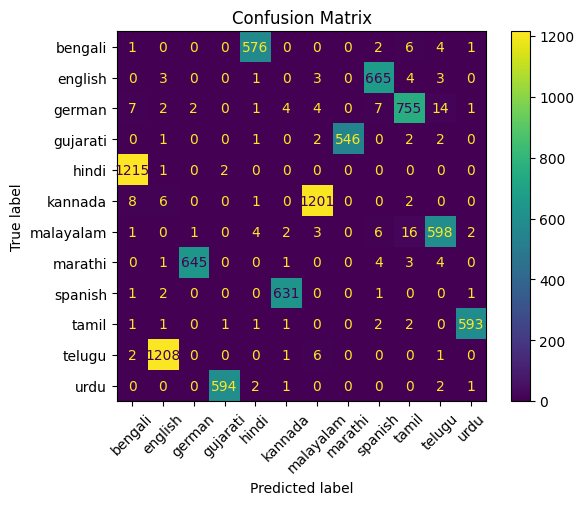

In [8]:
confusion_matrix_data = confusion_matrix(y_test, rfc_model.predict(X_test))

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

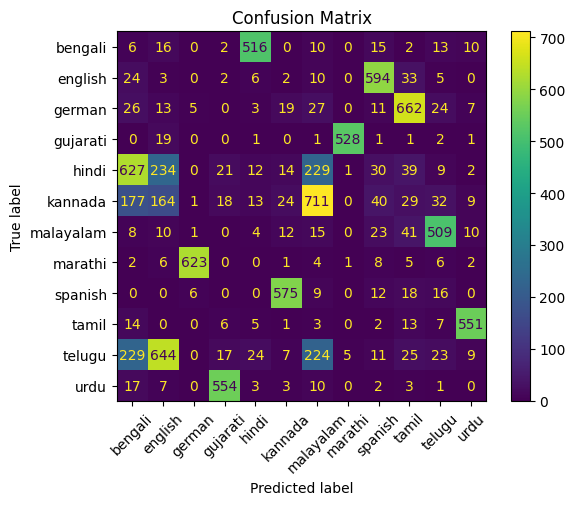

In [9]:
confusion_matrix_data = confusion_matrix(y_test, gbc_model.predict(X_test))

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

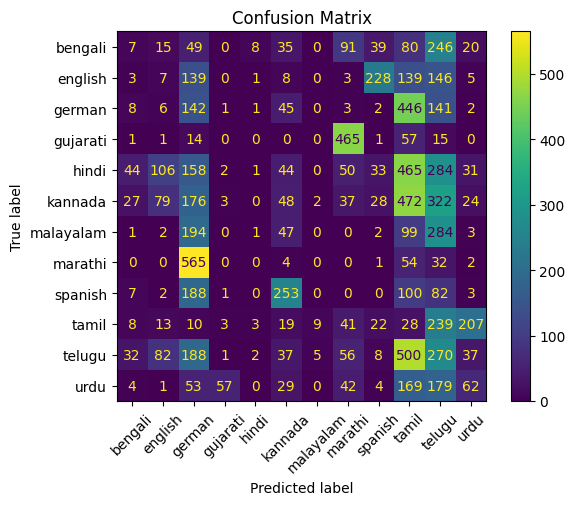

In [10]:
confusion_matrix_data = confusion_matrix(y_test, rfc_model.predict(X_test_scaled))

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

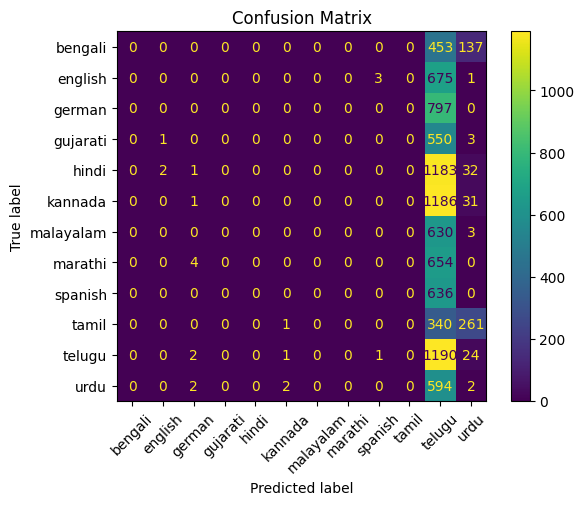

In [11]:
confusion_matrix_data = confusion_matrix(y_test, gbc_model.predict(X_test_scaled))

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

In [12]:
roc_auc_score(list(y_test), list(rfc_model.predict_proba(X_test)), multi_class='ovr', average='macro')

0.43826358694016193

In [13]:
roc_auc_score(list(y_test), list(gbc_model.predict_proba(X_test)), multi_class='ovr', average='macro')

0.40033500800408395

In [14]:
roc_auc_score(list(y_test), list(rfc_model_scaled.predict_proba(X_test_scaled)), multi_class='ovr', average='macro')

0.4389517413262329

In [15]:
roc_auc_score(list(y_test), list(gbc_model_scaled.predict_proba(X_test_scaled)), multi_class='ovr', average='macro')

0.40033503509910945

In [16]:
print(classification_report(y_test, rfc_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       590
           1       0.00      0.00      0.00       679
           2       0.00      0.00      0.00       797
           3       0.00      0.00      0.00       554
           4       0.00      0.00      0.00      1218
           5       0.00      0.00      0.00      1218
           6       0.00      0.00      0.00       633
           7       0.00      0.00      0.00       658
           8       0.00      0.00      0.00       636
           9       0.00      0.00      0.00       602
          10       0.00      0.00      0.00      1218
          11       0.00      0.00      0.00       600

    accuracy                           0.00      9403
   macro avg       0.00      0.00      0.00      9403
weighted avg       0.00      0.00      0.00      9403



In [17]:
print(classification_report(y_test, gbc_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       590
           1       0.00      0.00      0.00       679
           2       0.01      0.01      0.01       797
           3       0.00      0.00      0.00       554
           4       0.02      0.01      0.01      1218
           5       0.04      0.02      0.03      1218
           6       0.01      0.02      0.02       633
           7       0.00      0.00      0.00       658
           8       0.02      0.02      0.02       636
           9       0.01      0.02      0.02       602
          10       0.04      0.02      0.02      1218
          11       0.00      0.00      0.00       600

    accuracy                           0.01      9403
   macro avg       0.01      0.01      0.01      9403
weighted avg       0.02      0.01      0.01      9403



In [18]:
print(classification_report(y_test, rfc_model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.05      0.01      0.02       590
           1       0.02      0.01      0.01       679
           2       0.08      0.18      0.11       797
           3       0.00      0.00      0.00       554
           4       0.06      0.00      0.00      1218
           5       0.08      0.04      0.05      1218
           6       0.00      0.00      0.00       633
           7       0.00      0.00      0.00       658
           8       0.00      0.00      0.00       636
           9       0.01      0.05      0.02       602
          10       0.12      0.22      0.16      1218
          11       0.16      0.10      0.12       600

    accuracy                           0.06      9403
   macro avg       0.05      0.05      0.04      9403
weighted avg       0.06      0.06      0.05      9403



In [19]:
print(classification_report(y_test, gbc_model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       590
           1       0.00      0.00      0.00       679
           2       0.00      0.00      0.00       797
           3       0.00      0.00      0.00       554
           4       0.00      0.00      0.00      1218
           5       0.00      0.00      0.00      1218
           6       0.00      0.00      0.00       633
           7       0.00      0.00      0.00       658
           8       0.00      0.00      0.00       636
           9       0.00      0.00      0.00       602
          10       0.13      0.98      0.24      1218
          11       0.00      0.00      0.00       600

    accuracy                           0.13      9403
   macro avg       0.01      0.08      0.02      9403
weighted avg       0.02      0.13      0.03      9403



### Dense Model

In [20]:
mfcc_feature_mean_dataframe = pd.read_csv('../data/model_data/mfcc_feature_mean_dataframe_v1.csv', converters={'mfcc_features_mean': pd.eval})
mfcc_feature_mean_dataframe

,file_name,language_label,file_size_kb,sample_rate,audio_duration_sec,mfcc_features_mean
0,../data/spoken_language_identification/train/t...,german,241.913,22050,10,"[-300.68445, 89.6091, 7.92721, 13.455984, -7.7..."
1,../data/spoken_language_identification/train/t...,german,247.070,22050,10,"[-263.93332, 117.02668, 1.5109781, 10.758349, ..."
2,../data/spoken_language_identification/train/t...,german,235.787,22050,10,"[-314.33453, 107.28552, 36.247402, 30.700155, ..."
3,../data/spoken_language_identification/train/t...,german,236.962,22050,10,"[-315.92404, 101.78857, 30.910984, 27.501352, ..."
4,../data/spoken_language_identification/train/t...,german,239.393,22050,10,"[-309.02856, 100.20847, 22.71667, 26.422443, 8..."
...,...,...,...,...,...,...
188045,../data/model_data/chunked_audio\9_96_urdu.flac,urdu,231.222,22050,10,"[-289.52158, 119.929054, 3.1143055, 35.24892, ..."
188046,../data/model_data/chunked_audio\9_97_urdu.flac,urdu,269.815,22050,10,"[-210.34914, 111.94805, -7.401781, 19.434948, ..."
188047,../data/model_data/chunked_audio\9_98_urdu.flac,urdu,215.311,22050,10,"[-348.04916, 96.16326, 5.742584, 25.839731, 8...."
188048,../data/model_data/chunked_audio\9_99_urdu.flac,urdu,210.095,22050,10,"[-344.74905, 127.2353, 13.040299, 33.02013, 0...."


In [21]:
X_train, X_test, y_train, y_test = train_test_split(mfcc_feature_mean_dataframe, mfcc_feature_mean_dataframe['language_label'], stratify=mfcc_feature_mean_dataframe['language_label'], test_size=0.03, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, X_train['language_label'], stratify=X_train['language_label'], test_size=0.03, random_state=0)

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

print(f'\nTrain Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}')

ipd.display(X_train)

language_labels_cols = list(pd.get_dummies(X_train['language_label'], dtype=np.int32).columns.values)

X_train, X_val, X_test = (np.concatenate(X_train['mfcc_features_mean'].values, axis=0).reshape(-1, 40, 1),
                          np.concatenate(X_val['mfcc_features_mean'].values, axis=0).reshape(-1, 40, 1),
                          np.concatenate(X_test['mfcc_features_mean'].values, axis=0).reshape(-1, 40, 1))

y_train, y_val, y_test = (pd.get_dummies(y_train.values, dtype=np.int32).values,
                          pd.get_dummies(y_val.values, dtype=np.int32).values,
                          pd.get_dummies(y_test.values, dtype=np.int32).values)

print(f'Train Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}')
print(f'Target: Train Shape: {y_train.shape}, Validation Shape: {y_val.shape}, Test Shape: {y_test.shape}')


Train Shape: (176935, 6), Validation Shape: (5473, 6), Test Shape: (5642, 6)


,file_name,language_label,file_size_kb,sample_rate,audio_duration_sec,mfcc_features_mean
0,../data/model_data/chunked_audio\1_503_marathi...,marathi,169.249,22050,10,"[-372.60193, 97.58422, 11.535016, 16.202219, 1..."
1,../data/model_data/chunked_audio\12_559_telugu...,telugu,226.256,22050,10,"[-312.26233, 127.97743, -10.590753, 16.846308,..."
2,../data/spoken_language_identification/train/t...,english,172.434,22050,10,"[-436.2415, 72.27146, -21.515247, 28.214872, -..."
3,../data/model_data/chunked_audio\6_231_malayal...,malayalam,183.292,22050,10,"[-361.73267, 76.21364, -12.226183, 24.076464, ..."
4,../data/spoken_language_identification/train/t...,german,250.218,22050,10,"[-247.81427, 120.87878, -1.769096, 19.966732, ..."
...,...,...,...,...,...,...
176930,../data/model_data/chunked_audio\10_609_tamil....,tamil,247.179,22050,10,"[-246.22928, 120.01204, 14.8433275, 19.358667,..."
176931,../data/spoken_language_identification/train/t...,english,198.784,22050,10,"[-402.5719, 61.625023, -26.071997, 19.151659, ..."
176932,../data/model_data/chunked_audio\10_708_kannad...,kannada,181.656,22050,10,"[-339.5378, 135.2996, -82.566956, 11.61837, -5..."
176933,../data/model_data/chunked_audio\7_658_telugu....,telugu,230.366,22050,10,"[-318.65048, 84.14175, 1.3367115, 26.958487, 6..."


Train Shape: (176935, 40, 1), Validation Shape: (5473, 40, 1), Test Shape: (5642, 40, 1)
Target: Train Shape: (176935, 12), Validation Shape: (5473, 12), Test Shape: (5642, 12)


In [22]:
scaler_object = StandardScaler()

X_train_scaled = scaler_object.fit_transform(X_train.reshape(-1, 40)).reshape(-1, 40, 1)
X_val_scaled = scaler_object.transform(X_val.reshape(-1, 40)).reshape(-1, 40, 1)
X_test_scaled = scaler_object.transform(X_test.reshape(-1, 40)).reshape(-1, 40, 1)

In [23]:
def build_model_dense(input_shape: tuple, output_shape: int) -> object:
    model = Sequential()

    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(output_shape, activation='softmax'))

    return model

In [24]:
model = build_model_dense(input_shape=(40, ), output_shape=y_train.shape[1])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.AUC(curve='ROC')])

def learning_rate_decay(epoch: int) -> float:
	return 0.00158 * math.pow(0.9, math.floor((1 + epoch) / 1))

checkpoint_callback = ModelCheckpoint('../data/models/language_detection_model_unscaled_v1.keras', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
learning_rate_callback = LearningRateScheduler(learning_rate_decay)

model_history = model.fit(
    X_train, y_train, epochs=50, verbose=1, batch_size=32, callbacks=[checkpoint_callback, learning_rate_callback],
    validation_data=(X_val, y_val))

Epoch 1/50
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.6809 - auc: 0.9597 - loss: 0.8720 - val_accuracy: 0.8809 - val_auc: 0.9945 - val_loss: 0.3156 - learning_rate: 0.0014
Epoch 2/50
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.8428 - auc: 0.9898 - loss: 0.4305 - val_accuracy: 0.9413 - val_auc: 0.9975 - val_loss: 0.1810 - learning_rate: 0.0013
Epoch 3/50
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.8836 - auc: 0.9931 - loss: 0.3344 - val_accuracy: 0.9583 - val_auc: 0.9989 - val_loss: 0.1229 - learning_rate: 0.0012
Epoch 4/50
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9046 - auc: 0.9949 - loss: 0.2764 - val_accuracy: 0.9631 - val_auc: 0.9989 - val_loss: 0.1148 - learning_rate: 0.0010
Epoch 5/50
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9163 - auc: 0.9959 - loss: 0.2401 - val_accuracy: 0.9720 - val_auc: 0.9993 - val_loss: 0.0904 - learning_rate: 9.3297e-04
Epoch 6/50
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accu

In [25]:
model = build_model_dense(input_shape=(40, ), output_shape=y_train.shape[1])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

def learning_rate_decay(epoch: int) -> float:
	return 0.00158 * math.pow(0.9, math.floor((1 + epoch) / 1))

checkpoint_callback = ModelCheckpoint('../data/models/language_detection_model_scaled_v1.keras', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
learning_rate_callback = LearningRateScheduler(learning_rate_decay)

model_history = model.fit(
    X_train_scaled, y_train, epochs=50, verbose=1, batch_size=32, callbacks=[checkpoint_callback, learning_rate_callback],
    validation_data=(X_val_scaled, y_val))

Epoch 1/50
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.7081 - loss: 0.7977 - val_accuracy: 0.9194 - val_loss: 0.2281 - learning_rate: 0.0014
Epoch 2/50
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8768 - loss: 0.3560 - val_accuracy: 0.9614 - val_loss: 0.1220 - learning_rate: 0.0013
Epoch 3/50
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9143 - loss: 0.2541 - val_accuracy: 0.9731 - val_loss: 0.0860 - learning_rate: 0.0012
Epoch 4/50
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9328 - loss: 0.2031 - val_accuracy: 0.9825 - val_loss: 0.0571 - learning_rate: 0.0010
Epoch 5/50
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.9456 - loss: 0.1663 - val_accuracy: 0.9852 - val_loss: 0.0500 - learning_rate: 9.3297e-04
Epoch 6/50
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9535 - loss: 0.1453 - val_accuracy: 0.9859 - val_loss: 0.0442 - learning_rate: 8.3968e-04
Epoch 7/50
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accur

In [26]:
model = load_model('../data/models/language_detection_model_unscaled_v1.keras')
model.evaluate(X_test, y_test)

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9952 - auc: 1.0000 - loss: 0.0151


[0.014647001400589943, 0.9950371980667114, 0.9999902248382568]

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

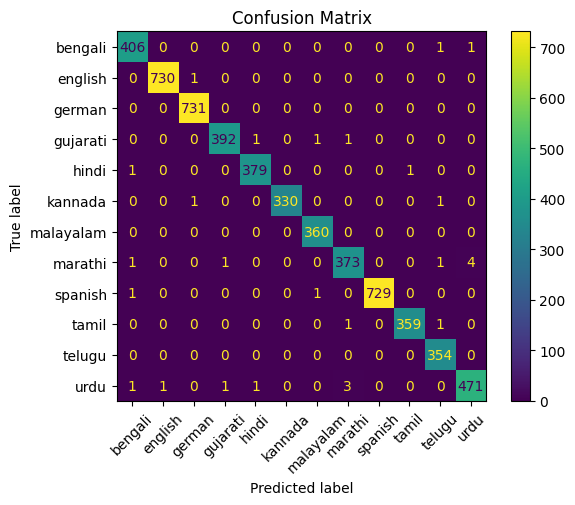

In [27]:
y_pred = model.predict(X_test)

y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0,len(y_pred))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

In [28]:
label_binarizer = LabelBinarizer().fit(y_test_argmax)

y_test_lb = label_binarizer.transform(y_test_argmax)
y_pred_lb = label_binarizer.transform(y_pred_argmax)

roc_auc_score(list(y_test_lb), list(y_pred_lb), multi_class='ovr', average='macro')

0.997005867019114

In [29]:
print(classification_report(y_test_argmax, y_pred_argmax))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       408
           1       1.00      1.00      1.00       731
           2       1.00      1.00      1.00       731
           3       0.99      0.99      0.99       395
           4       0.99      0.99      0.99       381
           5       1.00      0.99      1.00       332
           6       0.99      1.00      1.00       360
           7       0.99      0.98      0.98       380
           8       1.00      1.00      1.00       731
           9       1.00      0.99      1.00       361
          10       0.99      1.00      0.99       354
          11       0.99      0.99      0.99       478

    accuracy                           1.00      5642
   macro avg       0.99      0.99      0.99      5642
weighted avg       1.00      1.00      1.00      5642



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


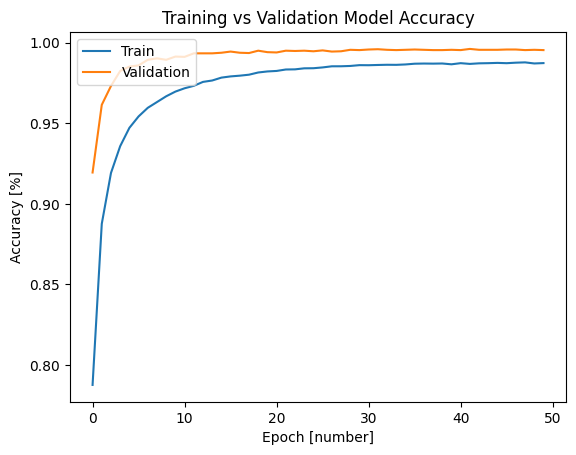

In [30]:
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Training vs Validation Model Accuracy')
plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch [number]')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

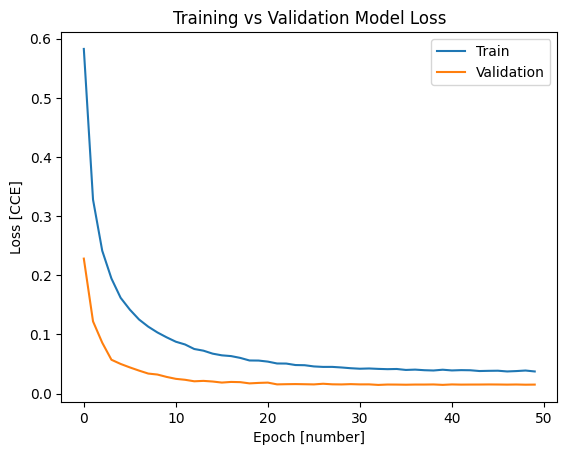

In [31]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Training vs Validation Model Loss')
plt.ylabel('Loss [CCE]')
plt.xlabel('Epoch [number]')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [32]:
model = load_model('../data/models/language_detection_model_scaled_v1.keras')
model.evaluate(X_test_scaled, y_test)

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9966 - loss: 0.0113 


[0.01028912141919136, 0.9964551329612732]

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

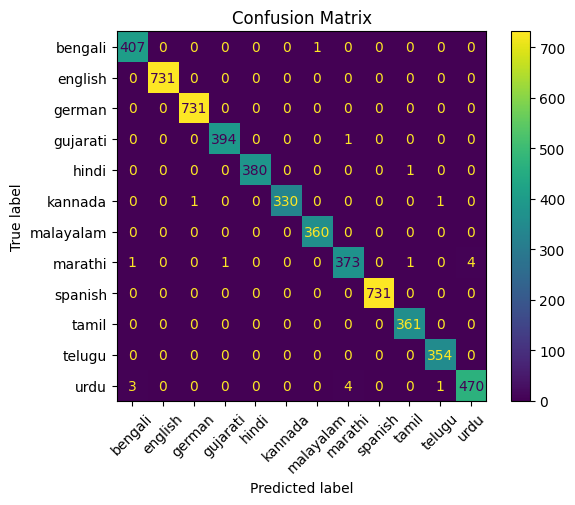

In [33]:
y_pred = model.predict(X_test_scaled)

y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0,len(y_pred))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

In [34]:
label_binarizer = LabelBinarizer().fit(y_test_argmax)

y_test_lb = label_binarizer.transform(y_test_argmax)
y_pred_lb = label_binarizer.transform(y_pred_argmax)

roc_auc_score(list(y_test_lb), list(y_pred_lb), multi_class='ovr', average='macro')

0.9978075688489197

In [35]:
print(classification_report(y_test_argmax, y_pred_argmax))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       408
           1       1.00      1.00      1.00       731
           2       1.00      1.00      1.00       731
           3       1.00      1.00      1.00       395
           4       1.00      1.00      1.00       381
           5       1.00      0.99      1.00       332
           6       1.00      1.00      1.00       360
           7       0.99      0.98      0.98       380
           8       1.00      1.00      1.00       731
           9       0.99      1.00      1.00       361
          10       0.99      1.00      1.00       354
          11       0.99      0.98      0.99       478

    accuracy                           1.00      5642
   macro avg       1.00      1.00      1.00      5642
weighted avg       1.00      1.00      1.00      5642



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


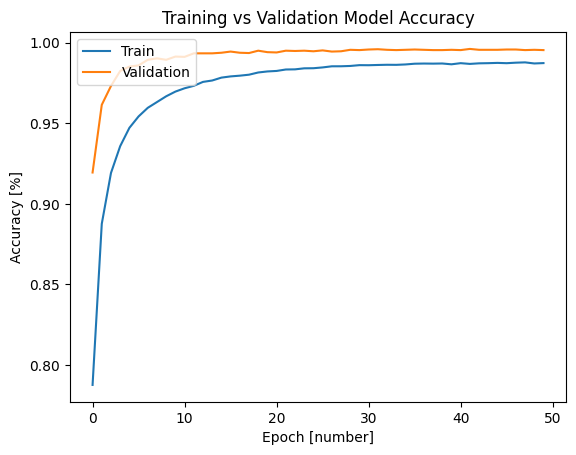

In [36]:
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Training vs Validation Model Accuracy')
plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch [number]')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

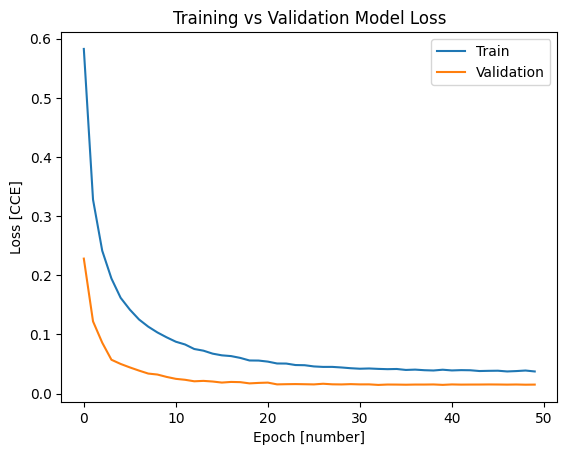

In [37]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Training vs Validation Model Loss')
plt.ylabel('Loss [CCE]')
plt.xlabel('Epoch [number]')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### CNN Model

In [38]:
mfcc_feature_dataframe = pd.read_csv('../data/model_data/mfcc_feature_dataframe_v1.csv', converters={'mfcc_features': pd.eval}, verbose=2)

Tokenization took: 6121.28 ms
Type conversion took: 2948803.77 ms
Parser memory cleanup took: 1.00 ms


In [39]:
X_train, X_test, y_train, y_test = train_test_split(mfcc_feature_dataframe, mfcc_feature_dataframe['language_label'], stratify=mfcc_feature_dataframe['language_label'], test_size=0.05, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, X_train['language_label'], stratify=X_train['language_label'], test_size=0.05, random_state=0)

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

print(f'\nTrain Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}')

ipd.display(X_train)

language_labels_cols = list(pd.get_dummies(X_train['language_label'], dtype=np.int32).columns.values)

X_train, X_val, X_test = (np.concatenate(X_train['mfcc_features'].values, axis=0).reshape(-1, 40, 431),
                          np.concatenate(X_val['mfcc_features'].values, axis=0).reshape(-1, 40, 431),
                          np.concatenate(X_test['mfcc_features'].values, axis=0).reshape(-1, 40, 431))

y_train, y_val, y_test = (pd.get_dummies(y_train.values, dtype=np.int32).values,
                          pd.get_dummies(y_val.values, dtype=np.int32).values,
                          pd.get_dummies(y_test.values, dtype=np.int32).values)

print(f'Train Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}')
print(f'Target: Train Shape: {y_train.shape}, Validation Shape: {y_val.shape}, Test Shape: {y_test.shape}')


Train Shape: (5415, 6), Validation Shape: (285, 6), Test Shape: (300, 6)


,file_name,language_label,file_size_kb,sample_rate,audio_duration_sec,mfcc_features
0,../data/model_data/chunked_audio\0_451_malayal...,malayalam,224.486,22050,10,"[[-201.0696563720703, -252.42071533203125, -27..."
1,../data/model_data/chunked_audio\2_50_hindi.flac,hindi,213.135,22050,10,"[[-203.6726837158203, -137.2501678466797, -119..."
2,../data/model_data/chunked_audio\3_344_hindi.flac,hindi,203.318,22050,10,"[[-187.26840209960938, -214.97872924804688, -3..."
3,../data/model_data/chunked_audio\8_479_bengali...,bengali,203.370,22050,10,"[[-550.7992553710938, -539.9030151367188, -539..."
4,../data/model_data/chunked_audio\8_70_hindi.flac,hindi,232.370,22050,10,"[[-131.61683654785156, -155.94882202148438, -1..."
...,...,...,...,...,...,...
5410,../data/spoken_language_identification/train/t...,english,217.701,22050,10,"[[-580.8419189453125, -580.787109375, -580.887..."
5411,../data/model_data/chunked_audio\11_668_hindi....,hindi,229.227,22050,10,"[[-605.42919921875, -611.2146606445312, -612.9..."
5412,../data/spoken_language_identification/train/t...,english,236.801,22050,10,"[[-321.0284118652344, -267.3987731933594, -286..."
5413,../data/spoken_language_identification/train/t...,english,227.976,22050,10,"[[-301.3959045410156, -301.8360290527344, -336..."


Train Shape: (5415, 40, 431), Validation Shape: (285, 40, 431), Test Shape: (300, 40, 431)
Target: Train Shape: (5415, 12), Validation Shape: (285, 12), Test Shape: (300, 12)


In [40]:
scaler_object = StandardScaler()

X_train_scaled = scaler_object.fit_transform(X_train.reshape(-1, 40 * 431)).reshape(-1, 40, 431)
X_val_scaled = scaler_object.transform(X_val.reshape(-1, 40 * 431)).reshape(-1, 40, 431)
X_test_scaled = scaler_object.transform(X_test.reshape(-1, 40 * 431)).reshape(-1, 40, 431)

In [41]:
X_train.shape

(5415, 40, 431)

In [42]:
X_train_scaled.shape

(5415, 40, 431)

In [43]:
def build_model_cnn(input_shape: tuple, output_shape: int) -> object:
    model = Sequential()

    model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='valid', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=1024, kernel_size=3, activation='relu', padding='same'))
    model.add(AveragePooling1D(pool_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=1024, kernel_size=3, activation='relu', padding='same'))
    model.add(AveragePooling1D(pool_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
    model.add(AveragePooling1D(pool_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(AveragePooling1D(pool_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(output_shape, activation='softmax'))

    return model

In [44]:
model = build_model_cnn(input_shape=(40, 431), output_shape=y_train.shape[1])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

def learning_rate_decay(epoch: int) -> float:
	return 0.00158 * math.pow(0.9, math.floor((1 + epoch) / 1))

checkpoint_callback = ModelCheckpoint('../data/models/language_detection_model_unscaled_v2.keras', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
learning_rate_callback = LearningRateScheduler(learning_rate_decay)

model_history = model.fit(
    X_train, y_train, epochs=50, verbose=1, batch_size=32, callbacks=[checkpoint_callback, learning_rate_callback],
    validation_data=(X_val, y_val))

Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - accuracy: 0.5109 - loss: 1.4813 - val_accuracy: 0.4000 - val_loss: 2.8420 - learning_rate: 0.0014
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.7238 - loss: 0.7045 - val_accuracy: 0.5404 - val_loss: 1.4904 - learning_rate: 0.0013
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.7953 - loss: 0.5095 - val_accuracy: 0.6561 - val_loss: 0.9773 - learning_rate: 0.0012
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.8101 - loss: 0.4489 - val_accuracy: 0.6982 - val_loss: 0.9155 - learning_rate: 0.0010
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.8487 - loss: 0.3674 - val_accuracy: 0.8140 - val_loss: 0.4342 - learning_rate: 9.3297e-04
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.8692 - loss: 0.3003 - val_accuracy: 0.8070 - val_loss: 0.4848 - learning_rate: 8.3968e-04
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.

In [45]:
model = build_model_cnn(input_shape=(40, 431), output_shape=y_train.shape[1])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

def learning_rate_decay(epoch: int) -> float:
	return 0.00158 * math.pow(0.9, math.floor((1 + epoch) / 1))

checkpoint_callback = ModelCheckpoint('../data/models/language_detection_model_scaled_v2.keras', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
learning_rate_callback = LearningRateScheduler(learning_rate_decay)

model_history = model.fit(
    X_train_scaled, y_train, epochs=50, verbose=1, batch_size=32, callbacks=[checkpoint_callback, learning_rate_callback],
    validation_data=(X_val_scaled, y_val))

Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.4693 - loss: 1.5980 - val_accuracy: 0.5123 - val_loss: 1.7154 - learning_rate: 0.0014
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.7056 - loss: 0.8359 - val_accuracy: 0.6947 - val_loss: 0.8603 - learning_rate: 0.0013
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.7693 - loss: 0.5813 - val_accuracy: 0.7930 - val_loss: 0.5460 - learning_rate: 0.0012
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.8296 - loss: 0.4285 - val_accuracy: 0.8281 - val_loss: 0.4220 - learning_rate: 0.0010
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.8616 - loss: 0.3396 - val_accuracy: 0.8421 - val_loss: 0.3910 - learning_rate: 9.3297e-04
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.8929 - loss: 0.2561 - val_accuracy: 0.8211 - val_loss: 0.4415 - learning_rate: 8.3968e-04
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.

In [46]:
model = load_model('../data/models/language_detection_model_unscaled_v2.keras')
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9180 - loss: 0.2954


[0.34804239869117737, 0.8999999761581421]

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

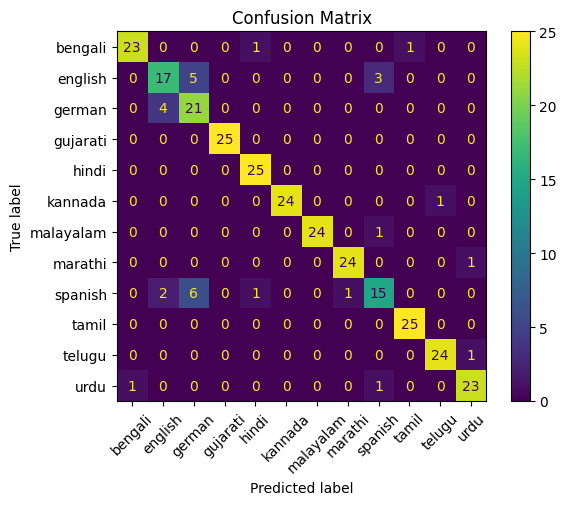

In [47]:
y_pred = model.predict(X_test)

y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0,len(y_pred))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

In [48]:
label_binarizer = LabelBinarizer().fit(y_test_argmax)

y_test_lb = label_binarizer.transform(y_test_argmax)
y_pred_lb = label_binarizer.transform(y_pred_argmax)

roc_auc_score(list(y_test_lb), list(y_pred_lb), multi_class='ovr', average='macro')

0.9454545454545454

In [49]:
print(classification_report(y_test_argmax, y_pred_argmax))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.74      0.68      0.71        25
           2       0.66      0.84      0.74        25
           3       1.00      1.00      1.00        25
           4       0.93      1.00      0.96        25
           5       1.00      0.96      0.98        25
           6       1.00      0.96      0.98        25
           7       0.96      0.96      0.96        25
           8       0.75      0.60      0.67        25
           9       0.96      1.00      0.98        25
          10       0.96      0.96      0.96        25
          11       0.92      0.92      0.92        25

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


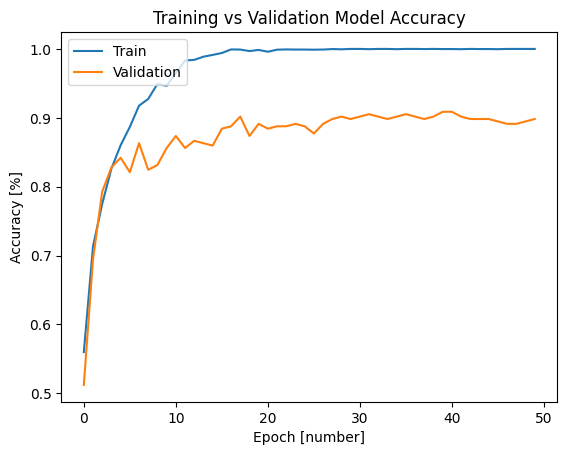

In [50]:
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Training vs Validation Model Accuracy')
plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch [number]')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

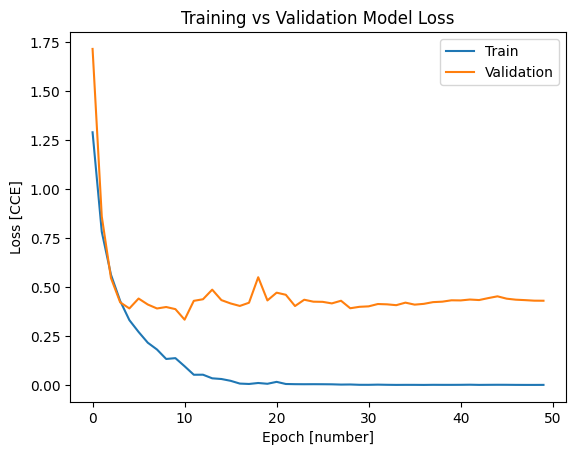

In [51]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Training vs Validation Model Loss')
plt.ylabel('Loss [CCE]')
plt.xlabel('Epoch [number]')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [52]:
model = load_model('../data/models/language_detection_model_scaled_v2.keras')
model.evaluate(X_test_scaled, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9062 - loss: 0.3263


[0.424435019493103, 0.8866666555404663]

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

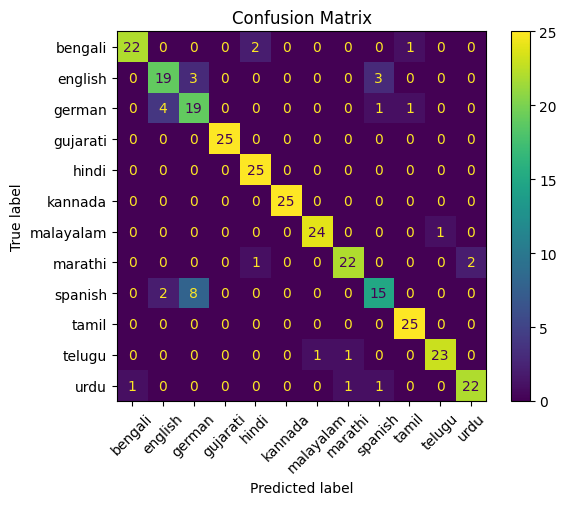

In [53]:
y_pred = model.predict(X_test_scaled)

y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0,len(y_pred))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

In [54]:
label_binarizer = LabelBinarizer().fit(y_test_argmax)

y_test_lb = label_binarizer.transform(y_test_argmax)
y_pred_lb = label_binarizer.transform(y_pred_argmax)

roc_auc_score(list(y_test_lb), list(y_pred_lb), multi_class='ovr', average='macro')

0.9381818181818181

In [55]:
print(classification_report(y_test_argmax, y_pred_argmax))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        25
           1       0.76      0.76      0.76        25
           2       0.63      0.76      0.69        25
           3       1.00      1.00      1.00        25
           4       0.89      1.00      0.94        25
           5       1.00      1.00      1.00        25
           6       0.96      0.96      0.96        25
           7       0.92      0.88      0.90        25
           8       0.75      0.60      0.67        25
           9       0.93      1.00      0.96        25
          10       0.96      0.92      0.94        25
          11       0.92      0.88      0.90        25

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


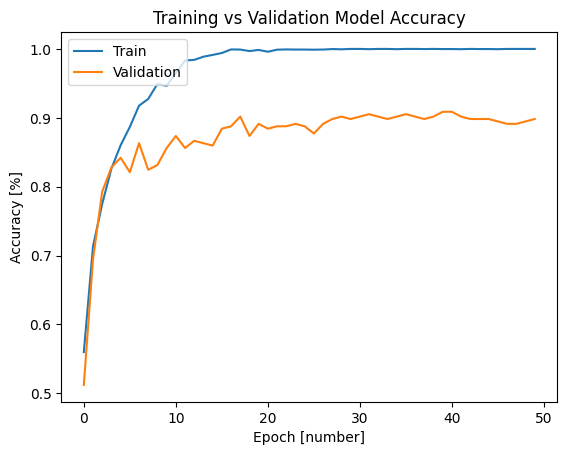

In [56]:
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Training vs Validation Model Accuracy')
plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch [number]')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

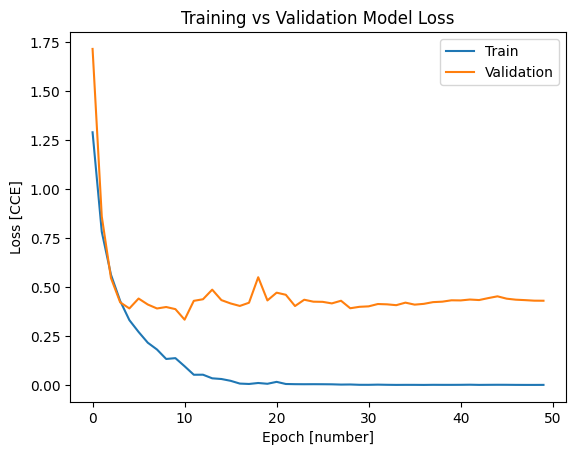

In [57]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Training vs Validation Model Loss')
plt.ylabel('Loss [CCE]')
plt.xlabel('Epoch [number]')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### CNN Spectogram Model

In [58]:
spectogram_images = image_dataset_from_directory("../data/model_data/spectrogram_images", labels="inferred", image_size=(64, 64), batch_size=None, shuffle=True)
class_names = spectogram_images.class_names

test_val_records = 150

test_images = spectogram_images.take(test_val_records)
train_images = spectogram_images.skip(test_val_records)

val_images = train_images.take(test_val_records)
train_images = train_images.skip(test_val_records)

size = (64, 64)

train_data = train_images.map(lambda x, y: (tf.image.resize(x, size), y))
val_data = val_images.map(lambda x, y: (tf.image.resize(x, size), y))
test_data = test_images.map(lambda x, y: (tf.image.resize(x, size), y))

print(f'Train Data Size: {len([i for i, v in enumerate(train_data.as_numpy_iterator())])}')
print(f'Validation Data Size: {len([i for i, v in enumerate(val_data.as_numpy_iterator())])}')
print(f'Test Data Size: {len([i for i, v in enumerate(test_data.as_numpy_iterator())])}')

Found 6000 files belonging to 12 classes.
Train Data Size: 5700
Validation Data Size: 150
Test Data Size: 150


In [59]:
train_image_data = np.array([images for (images, _) in train_data.as_numpy_iterator()])
val_image_data = np.array([images for (images, _) in val_data.as_numpy_iterator()])
test_image_data = np.array([images for (images, _) in test_data.as_numpy_iterator()])

train_labels = np.array([labels for (_, labels) in train_data.as_numpy_iterator()])
val_labels = np.array([labels for (_, labels) in val_data.as_numpy_iterator()])
test_labels = np.array([labels for (_, labels) in test_data.as_numpy_iterator()])

train_image_data, train_labels = np.concatenate(train_image_data, axis=0).reshape(-1, 64, 64, 3), pd.get_dummies(train_labels, dtype=np.int32).values
val_image_data, val_labels = np.concatenate(val_image_data, axis=0).reshape(-1, 64, 64, 3), pd.get_dummies(val_labels, dtype=np.int32).values
test_image_data, test_labels = np.concatenate(test_image_data, axis=0).reshape(-1, 64, 64, 3), pd.get_dummies(test_labels, dtype=np.int32).values

'english'

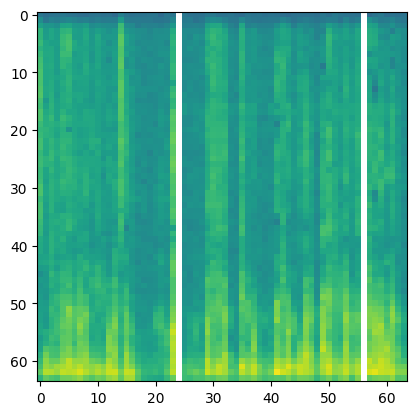

In [60]:
plt.imshow(np.array(train_image_data[0]).astype('uint8'))
class_names[np.argmax(train_labels[0])]

In [61]:
def build_model_cnn_spectrogram(output_shape: int) -> object:
    model = Sequential()

    model.add(Input(shape=(64, 64, 3), name='input'))
    model.add(Conv2D(128, (5, 5), activation='relu', padding='valid'))
    model.add(AveragePooling2D(pool_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
    model.add(AveragePooling2D(pool_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (5, 5), activation='relu', padding='same'))
    model.add(AveragePooling2D(pool_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(AveragePooling2D(pool_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(AveragePooling2D(pool_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(output_shape, activation='softmax'))

    return model

In [62]:
model = build_model_cnn_spectrogram(output_shape=12)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

def learning_rate_decay(epoch: int) -> float:
	return 0.00158 * math.pow(0.9, math.floor((1 + epoch) / 1))

checkpoint_callback = ModelCheckpoint('../data/models/language_detection_model_raw_v3.keras', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
learning_rate_callback = LearningRateScheduler(learning_rate_decay)

model_history = model.fit(
    train_image_data, train_labels, epochs=50, verbose=1, batch_size=32, callbacks=[checkpoint_callback, learning_rate_callback],
    validation_data=(val_image_data, val_labels))

Epoch 1/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 29s 151ms/step - accuracy: 0.0785 - loss: 2.8567 - val_accuracy: 0.0600 - val_loss: 4.9781 - learning_rate: 0.0014
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 148ms/step - accuracy: 0.0878 - loss: 2.6479 - val_accuracy: 0.0867 - val_loss: 8.0167 - learning_rate: 0.0013
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 148ms/step - accuracy: 0.0866 - loss: 2.5914 - val_accuracy: 0.0867 - val_loss: 2.6432 - learning_rate: 0.0012
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 143ms/step - accuracy: 0.0772 - loss: 2.5550 - val_accuracy: 0.0733 - val_loss: 2.5039 - learning_rate: 0.0010
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 142ms/step - accuracy: 0.0812 - loss: 2.5272 - val_accuracy: 0.0467 - val_loss: 2.5003 - learning_rate: 9.3297e-04
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 145ms/step - accuracy: 0.0881 - loss: 2.5185 - val_accuracy: 0.0467 - val_loss: 2.5270 - learning_rate: 8.3968e-04
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 25s 142ms/step - accur

In [63]:
model = load_model('../data/models/language_detection_model_raw_v3.keras')
model.evaluate(test_image_data, test_labels)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.1224 - loss: 2.5139


[2.5210747718811035, 0.1133333370089531]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.08      0.07      0.07        15
           2       0.00      0.00      0.00         8
           3       0.06      0.08      0.07        13
           4       0.00      0.00      0.00        15
           5       0.25      0.22      0.24        18
           6       0.12      0.13      0.13        15
           7       0.11      0.22      0.15         9
           8       0.00      0.00      0.00         7
           9       0.30      0.33      0.32         9
          10       0.00      0.00      0.00        14
          11       0.19      0.27      0.22        15

    accuracy                           0.11       150
   macro avg       0.09      0.11      0.10       150
weighted avg       0.10      0.11      0.10       150



<Figure size 800x600 with 0 Axes>

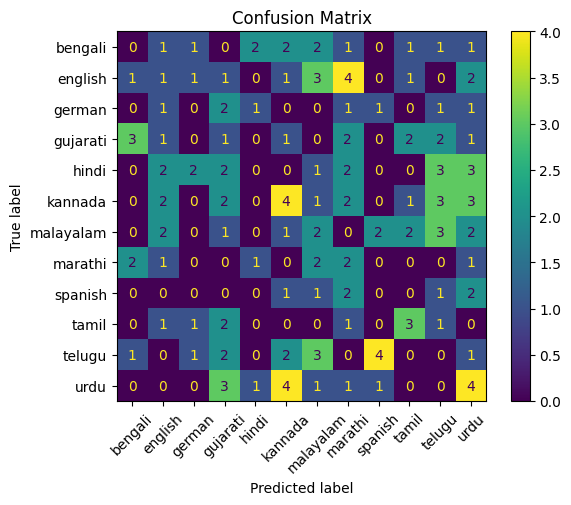

In [64]:
y_pred = model.predict(test_image_data)

y_test_argmax = [np.argmax(test_labels[i,:]) for i in range(0, len(test_labels))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0, len(test_labels))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=class_names)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

print(classification_report(y_test_argmax, y_pred_argmax))

In [65]:
label_binarizer = LabelBinarizer().fit(y_test_argmax)

y_test_lb = label_binarizer.transform(y_test_argmax)
y_pred_lb = label_binarizer.transform(y_pred_argmax)

roc_auc_score(list(y_test_lb), list(y_pred_lb), multi_class='ovr', average='macro')

0.5146035138100197

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


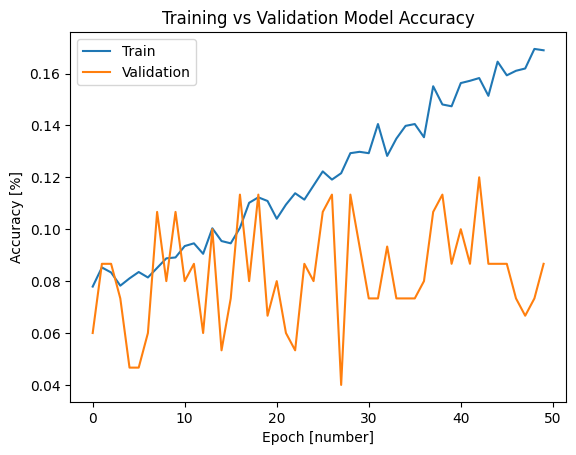

In [66]:
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Training vs Validation Model Accuracy')
plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch [number]')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

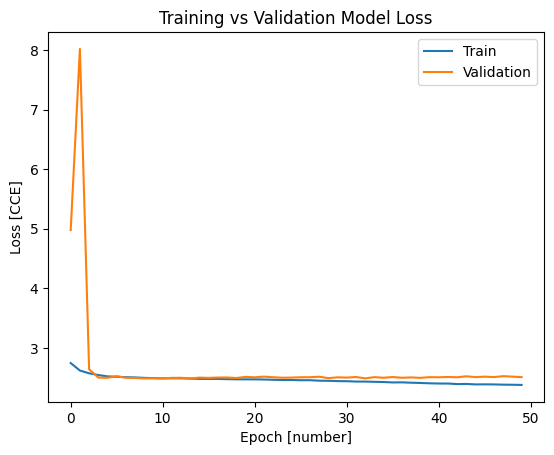

In [67]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Training vs Validation Model Loss')
plt.ylabel('Loss [CCE]')
plt.xlabel('Epoch [number]')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()